### import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
lks = gpd.read_file('./landkreise_deutschland__with_wiki_data__simplified20.geojson')

<AxesSubplot:>

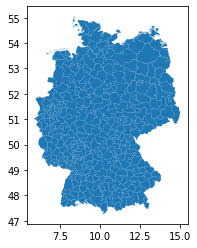

In [4]:
lks.plot()

In [5]:
lks['NEIGHBORS'] = None
for index, lk in lks.iterrows():   

    # get 'not disjoint' countries
    neighbors = lks[~lks.geometry.disjoint(lk.geometry)]

    lks.at[index, "NEIGHBORS"] = neighbors


In [6]:
ms = lks.loc[lks['GEN']=="Münster"]

In [7]:
ms["NEIGHBORS"].describe()

count                                                     1
unique                                                    1
top           ADE  GF  BSG     RS    AGS        SDV_RS  ...
freq                                                      1
Name: NEIGHBORS, dtype: object

In [8]:
ms["NEIGHBORS"].iloc[0]["GEN"]

91      Münster
93     Coesfeld
95    Steinfurt
96    Warendorf
Name: GEN, dtype: object

In [9]:
ms

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,DEBKG_ID,destatis,geometry,NEIGHBORS
91,4,4,1,05515,05515,055150000000,Münster,Kreisfreie Stadt,40,--,...,000,R,DEA33,055150000000,05515000,1975-01-01,DEBKGDL20000E23Y,"{'population': 314319, 'population_m': 150836,...","POLYGON ((7.62300 52.04732, 7.62971 52.04379, ...",ADE GF BSG RS AGS SDV_RS ...


In [28]:
int(ms.AGS.iloc[0])

5515

In [37]:
neighbours_ms_ags = ms['NEIGHBORS'].iloc[0].AGS.map(int)

In [38]:
neighbours_ms_ags.to_list()

[5515, 5558, 5566, 5570]

In [39]:
for nags in neighbours_ms_ags: print(nags)

5515
5558
5566
5570


In [43]:
lks.count()

ADE          431
GF           431
BSG          431
RS           431
AGS          431
SDV_RS       431
GEN          431
BEZ          431
IBZ          431
BEM          431
NBD          431
SN_L         431
SN_R         431
SN_K         431
SN_V1        431
SN_V2        431
SN_G         431
FK_S3        431
NUTS         431
RS_0         431
AGS_0        431
WSK          431
DEBKG_ID     431
destatis     431
geometry     431
NEIGHBORS    431
dtype: int64

In [45]:
lks.shape


(431, 26)